# ML Classifier State Farm 
## Data Science Position Challenge

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
l_encoder = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

## Data Loading 
Upload the data from the exercise_01_train.csv file into memory

In [2]:
data_train = pd.read_csv('data_files/exercise_01_train.csv', low_memory=False)

## Data Exploration and Cleansing 


In [3]:
display('SHAPE', data_train.shape, 'HEAD', data_train.head(), 'TAIL', data_train.tail())

'SHAPE'

(40000, 101)

'HEAD'

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


'TAIL'

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
39995,20.844737,-33.785846,-0.346804,-3.406866,34.771517,-57.951056,-0.288205,1.371940,3.335447,1.765670,...,-2.985304,7.312132,asia,5.964857,-13.061671,-8.062604,16.618593,-3.609543,0.631066,0
39996,1.666154,16.241028,12.623090,-6.168540,-10.650748,69.840299,-0.965011,-4.321631,3.071324,-0.209940,...,-5.842786,3.563600,asia,4.895863,-1.342384,-10.275539,14.046990,-0.320440,46.051387,0
39997,1.795836,-15.706685,1.009672,-0.887671,-11.580529,3.237055,0.541397,2.562310,-0.623586,3.300388,...,7.503255,-11.064043,america,6.783607,15.293008,-6.194035,-4.725605,-1.321478,27.836630,0
39998,50.168318,-4.272643,2.409248,-11.697615,39.234827,31.353302,1.416008,1.825775,2.027886,-3.753114,...,-1.411384,-17.587621,america,6.278226,-18.743967,-8.067506,5.258203,-2.623772,-15.550075,0
39999,-8.653274,10.572796,1.377445,-21.472814,-42.686853,28.893360,3.379456,-1.241659,-0.040278,0.612898,...,7.622624,-6.473851,asia,0.055730,-6.506186,12.434701,-6.001283,-5.340633,18.276723,1


---- 
Checking the target feature 


In [4]:
data_train.y.unique()

array([0, 1])

---- 
Checking the Number of NANs per column

In [5]:
# Create df with number of NaN on each column
use_col = pd.DataFrame(data_train.isnull().sum().sort_values())
use_col.reset_index(drop = False, inplace=True)
use_col.columns = (['col_name','num_NaN'])
use_col.num_NaN.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

There are not that many NAN's for a data set with 40K rows. 
____

#### NAN Distribution
Counting number of columns with NAN's

In [6]:
numbers = [5, 10, 15, 20, 25, 50, 75, 100]
print('Num_NANs\tNum_of_NANcols_Total\tNum_of_NANcols_range')
counter = 0
for pos, num in enumerate(numbers):
    if counter == 0:
        l1 = 0
    else:
        pos1 = pos - 1
        num1 = numbers[pos1]
        l1 = pd.DataFrame(data_train.isnull().sum().sort_values()[data_train.isnull().sum().sort_values()<num1]).shape[0]
    l2 = pd.DataFrame(data_train.isnull().sum().sort_values()[data_train.isnull().sum().sort_values()<num]).shape[0]
    counter = counter+1
    print('\t', num, '\t\t', l2, '\t\t\t', l2 - l1)

Num_NANs	Num_of_NANcols_Total	Num_of_NANcols_range
	 5 		 13 			 13
	 10 		 69 			 56
	 15 		 100 			 31
	 20 		 101 			 1
	 25 		 101 			 0
	 50 		 101 			 0
	 75 		 101 			 0
	 100 		 101 			 0


In [7]:
# Determine the impact of removing all NANs from the dataset
data_train2 = data_train.dropna(axis=0)
print('Original\tNoNAN')
print(data_train.shape, data_train2.shape)
print(20*'#', '\npct_chage = {}'.format(np.round((data_train2.shape[0]/data_train.shape[0]-1),2)))

Original	NoNAN
(40000, 101) (39199, 101)
#################### 
pct_chage = -0.02


In [8]:
# impact on target feature
impact = pd.concat([data_train.y.value_counts(), data_train2.y.value_counts() ], 1)
impact.columns =['pre', 'post']
impact.loc[:,'pct_change'] = round(impact.post/impact.pre -1, 4)
impact

,pre,post,pct_change
0,31953,31318,-0.0199
1,8047,7881,-0.0206


In [9]:
# Confirming the removal of the NAN in the second dataframe
use_col2 = pd.DataFrame(data_train2.isnull().sum().sort_values())
use_col2.reset_index(drop = False, inplace=True)
use_col2.columns = (['col_name','num_NaN'])
use_col2.num_NaN.unique()

array([0])

---- 
- It seems that NAN's presence in the dataset is not widespread in the data, with only 801, ~2%, of the rows having them. 

- The impact for each category (0 and 1) is similar. 

- Removing all rows with NANs does not appear to have a great impact on the whole analysis.  

- I decided to keep the NANs and fill their value with the mean for numeric features and mode for non-numeric
----

## Feature cleansing and selection

### Target feature (y)


In [10]:
data_train.y.unique()

array([0, 1])

### Other features

In [11]:
# Custom functions needed later
def types_of_columns(df):
    '''
    This function determines the category of the columns and returns a tuple with 2 df with column names for
    numeric types and object types
    '''
    non_num_cols = df.dtypes[df.dtypes == 'object']
    float_cols   = df.dtypes[df.dtypes != 'object']
    return non_num_cols, float_cols

def column_checker (df1, df2, min_len):
    '''
    Check the contents of the provided columns in df1 and types in df2
    If the column has more unique values than min_len, the function prints
        column name, number of unique values, and an array with the unique values
    '''
    for col in range(0,len(df2)):
        col = df2.index[col]
        values = df1[col].unique()
        if len(values) > min_len:
            print('\n{}\n{}\n{}'.format(col, len(values), values))

Checking columns by column type

In [12]:
col_types_original = types_of_columns(data_train)

#### - Non-Numeric Features

In [13]:
nn_col_list = col_types_original[0]
nn_col_list

x34    object
x35    object
x41    object
x45    object
x68    object
x93    object
dtype: object

In [14]:
column_checker(data_train, nn_col_list, 1)


x34
11
['bmw' 'nissan' 'Honda' 'Toyota' 'volkswagon' 'tesla' 'chrystler' 'ford'
 'mercades' nan 'chevrolet']

x35
9
['wed' 'thur' 'thurday' 'wednesday' 'friday' 'tuesday' 'monday' 'fri' nan]

x41
37833
['$-54.1' '$-229.32' '$243.68' ... '$1215.91' '$-723.78' '$-426.49']

x45
11
['0.0%' '0.01%' '-0.01%' '0.02%' '-0.02%' '-0.0%' '-0.03%' '0.03%' '0.04%'
 '-0.04%' nan]

x68
13
['Jun' 'July' 'May' 'Aug' 'Apr' 'Mar' 'Oct' 'sept.' 'Nov' 'Feb' 'Dev' nan
 'January']

x93
4
['euorpe' 'asia' 'america' nan]


---- 
From the above print out:

- Six columns are non-numeric. 

- Of these 6:
    
    - 'x41' appears to be a price and should be converted to numeric. 

    - 'x45' has numbers on it, but they appear to be percent ranges. This column does not appear to need corrections

    - The other 4, are categorical with errors that need to be corrected. 
        
        For example: 'x35' appears to be days of the week, and 'friday' and 'fri' should be the same. 


In [15]:
# Converting x41 to numeric after removing the '$' sign
data_train.loc[:,'x41'] = data_train.x41.str.replace('$', " ").astype(float)

In [16]:
#### Fixing 'typos'
#x34 to title and keep only the first three letters of the brands
data_train.loc[:,'x34'] = data_train.x34.str[:3].str.upper()

#x35 and x68 to 3 letter format
data_train.loc[:,'x35'] = data_train.x35.str[:3].str.title().str.upper()
data_train.loc[:,'x68'] = data_train.x68.str[:3].str.title().str.upper()
data_train.loc[:,'x68'] = np.where(data_train.x68 == 'DEV', 'DEC', data_train.x68)

#x93 Europe appears to have a typo
data_train.loc[:,'x93'] = np.where(data_train.x93 == 'euorpe', 'EUROPE', data_train.x93.str.upper())

In [17]:
# Check the corrections
column_checker(data_train, types_of_columns(data_train)[0], 0)


x34
11
['BMW' 'NIS' 'HON' 'TOY' 'VOL' 'TES' 'CHR' 'FOR' 'MER' nan 'CHE']

x35
6
['WED' 'THU' 'FRI' 'TUE' 'MON' nan]

x45
11
['0.0%' '0.01%' '-0.01%' '0.02%' '-0.02%' '-0.0%' '-0.03%' '0.03%' '0.04%'
 '-0.04%' nan]

x68
13
['JUN' 'JUL' 'MAY' 'AUG' 'APR' 'MAR' 'OCT' 'SEP' 'NOV' 'FEB' 'DEC' nan
 'JAN']

x93
4
['EUROPE' 'ASIA' 'AMERICA' nan]


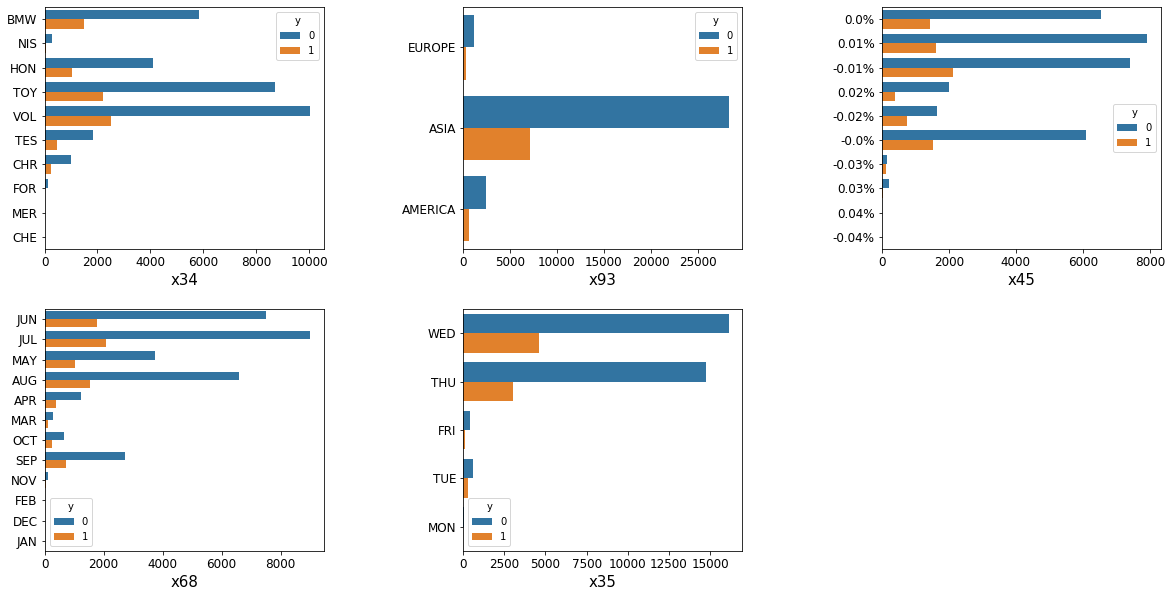

In [18]:
# Chekcing the distribution of the data for each of the non numeric (after correction) columns
nn_col_list = types_of_columns(data_train)[0].index
row = 2
col = 3
fig, axs = pl.subplots(row, col, figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.25)
axs[1, 2].axis('off')

for num, name in enumerate(nn_col_list):
    y = data_train[name]
    hue = data_train['y']
    i = num%row
    j = num%col
    graph = sns.countplot(y = y, hue = hue, ax = axs[i,j], linewidth = 1.5)
    graph.set_xlabel(name, fontsize=15)
    graph.set_ylabel('', fontsize=1)
    graph.tick_params(labelsize=12)

In [19]:
for col in nn_col_list:
    series = data_train.groupby([col, 'y'])['y'].count()
    print ('\n',series)


 x34  y
BMW  0     5831
     1     1473
CHE  0       10
     1        1
CHR  0      981
     1      242
FOR  0      132
     1       33
HON  0     4099
     1     1030
MER  0       28
     1        4
NIS  0      271
     1       65
TES  0     1820
     1      455
TOY  0     8729
     1     2217
VOL  0    10046
     1     2526
Name: y, dtype: int64

 x35  y
FRI  0      447
     1      100
MON  0       31
     1       25
THU  0    14726
     1     3007
TUE  0      606
     1      323
WED  0    16135
     1     4590
Name: y, dtype: int64

 x45     y
-0.0%   0    6081
        1    1519
-0.01%  0    7412
        1    2133
-0.02%  0    1641
        1     747
-0.03%  0     147
        1     137
-0.04%  0       3
        1      12
0.0%    0    6526
        1    1432
0.01%   0    7913
        1    1633
0.02%   0    2000
        1     389
0.03%   0     214
        1      44
0.04%   0      12
Name: y, dtype: int64

 x68  y
APR  0    1241
     1     400
AUG  0    6598
     1    1557
DEC  0      1

----
#### - Numeric Features

In [20]:
len(types_of_columns(data_train2)[1].index.drop('y'))

94

In [21]:
num_col_list = types_of_columns(data_train)[1].index.drop(['y'])
for col in num_col_list:
    length = len(data_train[col].unique())
    print (col, length)

x0 39987
x1 39991
x2 39995
x3 39991
x4 39995
x5 39991
x6 39994
x7 39988
x8 39995
x9 39994
x10 39993
x11 39992
x12 39990
x13 39988
x14 39998
x15 39993
x16 39993
x17 39990
x18 39987
x19 39993
x20 39995
x21 39988
x22 39996
x23 39992
x24 39990
x25 39993
x26 39990
x27 39993
x28 39990
x29 39996
x30 39996
x31 39993
x32 39997
x33 39992
x36 39994
x37 39998
x38 39995
x39 39993
x40 39995
x41 37833
x42 39989
x43 40000
x44 39997
x46 39994
x47 39997
x48 39991
x49 39995
x50 39996
x51 39990
x52 39993
x53 39997
x54 39995
x55 39987
x56 39990
x57 39993
x58 39994
x59 39992
x60 39989
x61 39995
x62 39988
x63 39988
x64 39996
x65 39989
x66 39991
x67 39993
x69 39988
x70 39997
x71 39997
x72 39993
x73 39995
x74 39994
x75 39991
x76 39994
x77 39991
x78 39994
x79 39992
x80 39994
x81 39996
x82 39994
x83 39996
x84 39998
x85 39989
x86 39992
x87 39994
x88 39997
x89 39991
x90 39994
x91 39999
x92 39995
x94 39990
x95 39994
x96 39986
x97 39994
x98 39996
x99 39988


 - Replacing NAN in numeric features with the mean of the column 

In [22]:
for column in data_train[types_of_columns(data_train)[1].index]:
    data_train[column] = data_train[column].fillna(data_train[column].mean())

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(95), int64(1), object(5)
memory usage: 30.8+ MB


- Checking for correlations between the numeric features

In [24]:
# Generating the dataframe for the correlation 
num_col_list = types_of_columns(data_train)[1].index.drop('y')
cor_df = pd.DataFrame()
for i in range(0,len(num_col_list)):
    cor_df = pd.concat([cor_df, data_train[num_col_list[i]]],axis=1)    
# Calculate the correlation
corr = cor_df.corr()

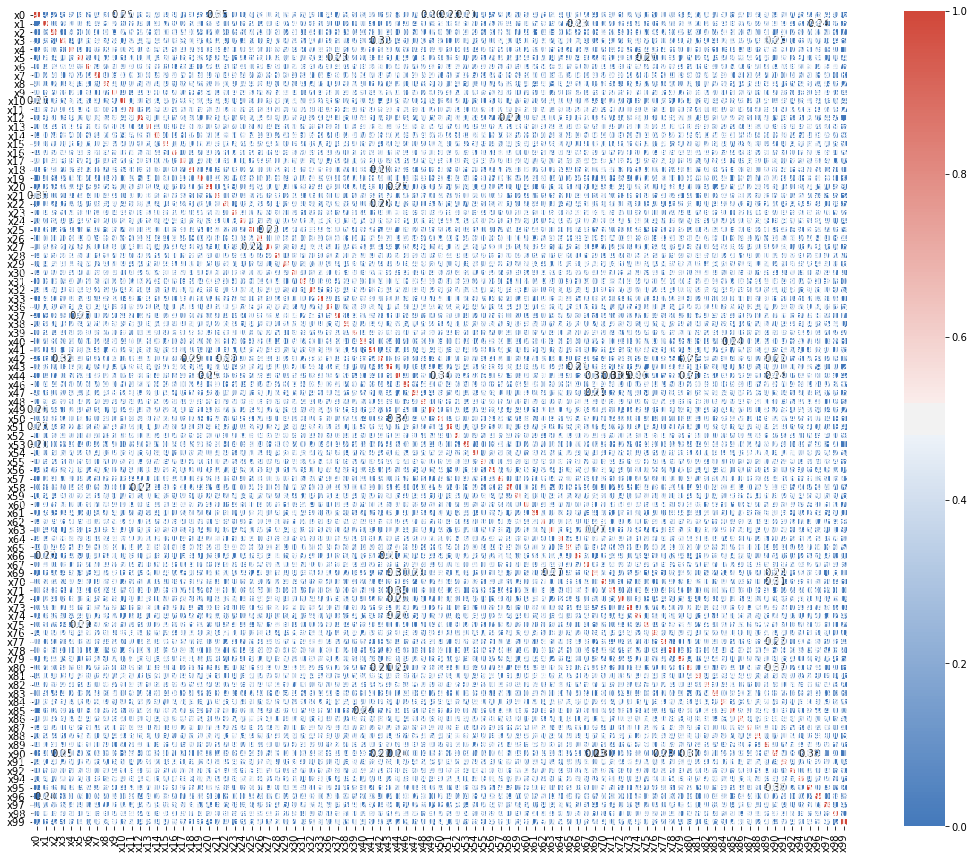

In [26]:
# Plot the correlations 
f, ax = pl.subplots(figsize=(20, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, as_cmap=True),
            square=True, ax=ax, annot=True, vmin=0, vmax=1, linewidths=2, xticklabels=1, yticklabels=True)

- The plot is not that informative, except that there appears to be low or relatively los correlations (just by tracking the colors)

- To confirm this observation, the following cell determines the higher and lower correlation (r^2) for each column

In [28]:
cor_summary = pd.DataFrame(columns = ['column', 'max_corr', 'min_corr'])
for col in corr.columns:
    df = corr.drop(col)
    df1 = {}
    df1['column']   = [col]
    df1['max_corr'] = [df[col].max()]
    df1['min_corr'] = [df[col].min()]
    cor_summary = pd.concat([cor_summary, pd.DataFrame.from_dict(df1)], 0)
cor_summary.describe()

,max_corr,min_corr
count,95.000000,95.000000
mean,0.141918,-0.132392
std,0.127059,0.120357
min,0.007466,-0.408862
25%,0.012395,-0.226751
50%,0.169570,-0.154942
75%,0.243796,-0.012633
max,0.376744,-0.008931


- The r^2 values are between -0.408862 and 0.376744

- There seems that the columns are not heavily correlated and therefore non should be removed for this reason. 
___

- Removing Outliers

In [29]:
data_train = data_train.reset_index(drop = True)
out_df = data_train.drop('y', 1)
outliers_all = np.array([], dtype='int64')
for column in types_of_columns(out_df)[1].index:
    Q1 = np.percentile(out_df[column], 25)
    Q3 = np.percentile(out_df[column], 75)
    step = (Q3 - Q1)*2
    out_list_feat=list(out_df[~((out_df[column] >= Q1 - step) & (out_df[column] <= Q3 + step))].index)
    outliers_all = np.append(outliers_all, out_list_feat)

from collections import Counter
out_count = Counter(outliers_all)
out_customer =[]
for customer, count in out_count.items():
    if count > 1:
        out_customer.append(customer.astype(int))
outliers  = list(sorted(out_customer))

print("%d outliers found in more than one feature will be remove" % len(outliers))
data_train_no = data_train.drop(data_train.index[outliers])
print(data_train.shape, data_train_no.shape)
data_enc = data_train_no.copy()

187 outliers found in more than one feature will be remove
(40000, 101) (39813, 101)


- Double checking correlations after oulier elimination

In [30]:
num_col_list = types_of_columns(data_train_no)[1].index.drop('y')
cor_df = pd.DataFrame()
for i in range(0,len(num_col_list)):
    cor_df = pd.concat([cor_df, data_train[num_col_list[i]]],axis=1)    

In [31]:
cor_summary = pd.DataFrame(columns = ['column', 'max_corr', 'min_corr'])
for col in corr.columns:
    df = corr.drop(col)
    df1 = {}
    df1['column']   = [col]
    df1['max_corr'] = [df[col].max()]
    df1['min_corr'] = [df[col].min()]
    cor_summary = pd.concat([cor_summary, pd.DataFrame.from_dict(df1)], 0)
cor_summary.describe()

,max_corr,min_corr
count,95.000000,95.000000
mean,0.141918,-0.132392
std,0.127059,0.120357
min,0.007466,-0.408862
25%,0.012395,-0.226751
50%,0.169570,-0.154942
75%,0.243796,-0.012633
max,0.376744,-0.008931


- Encoding categorical columns

In [32]:
for col in types_of_columns(data_train_no)[0].index:
    data_train_no[col] = data_train_no[col].fillna(data_train_no[col].mode()[0])
    data_train_no[col] = l_encoder.fit_transform(data_train_no[col])
data_train_no.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,2,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,1,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,1,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,1,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,1,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [33]:
print(data_train_no.shape)

(39813, 101)


## Building Classifiers
____

 - Spliting into features and target

In [34]:
target = data_train_no['y'].values
features = data_train_no.drop(['y'], axis=1).values
print ('Original data %d, target: %d, features: %d' % (data_train_no.shape[0], target.shape[0], features.shape[0]))

Original data 39813, target: 39813, features: 39813


- Split data into training, valdation, and testing subsets

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

### Artificial Neural Network
#### Building the model

In [36]:
# Standarizing the features
from sklearn.preprocessing import StandardScaler
sc      = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val   = sc.transform(X_val)
X_test  = sc.transform(X_test)

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 100))
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
classifier = Sequential()
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 100))
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

W0818 18:31:42.390285 4558742976 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 18:31:42.409387 4558742976 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 18:31:42.413457 4558742976 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 18:31:42.443603 4558742976 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 18:31:42.458039 4558742976 deprecation_wrapper.py:119] From //anac

    - Fitting the model with the training set

In [39]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10, verbose = 0)

W0818 18:32:01.836641 4558742976 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



    - Crossvalidation

In [40]:
from keras.wrappers.scikit_learn import KerasClassifier # keras wrapper for sklearn
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier_cv = Sequential()
    classifier_cv.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 100))
    classifier_cv.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
    classifier_cv.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier_cv.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_cv

classifier_cv = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier_cv, X = X_train, y = y_train, cv = 10)

mean = accuracies.mean()
variance = accuracies.std()

Epoch 1/10
21498/21498 [==============================] - 2s 77us/step - loss: 0.2550 - acc: 0.8997: 1s - loss
Epoch 2/10
21498/21498 [==============================] - 1s 62us/step - loss: 0.1375 - acc: 0.9561
Epoch 3/10
21498/21498 [==============================] - 1s 65us/step - loss: 0.1097 - acc: 0.9648
Epoch 4/10
21498/21498 [==============================] - 1s 68us/step - loss: 0.0962 - acc: 0.9705
Epoch 5/10
21498/21498 [==============================] - 1s 67us/step - loss: 0.0880 - acc: 0.9741
Epoch 6/10
21498/21498 [==============================] - 1s 68us/step - loss: 0.0841 - acc: 0.9748
Epoch 7/10
21498/21498 [==============================] - 1s 67us/step - loss: 0.0786 - acc: 0.9773
Epoch 8/10
21498/21498 [==============================] - 1s 65us/step - loss: 0.0758 - acc: 0.9786
Epoch 9/10
21498/21498 [==============================] - 1s 69us/step - loss: 0.0735 - acc: 0.9788
Epoch 10/10
2389/2389 [==============================] - 0s 38us/step
Epoch 1/10
21498/21

In [41]:
print('Mean cv accuracy = {:.4f}% +/- {:.4f}'.format(mean *100, variance *100) )

Mean cv accuracy = 96.3076% +/- 0.5545


    - Validation and optimization

In [42]:
# Accuracy on the validation set
loss, accuracy = classifier.evaluate(X_val, y_val,batch_size=128, verbose=0)
print("Accuracy = {:.4f}%, Loss = {:.4f}".format(accuracy* 100, loss))

Accuracy = 96.5673%, Loss = 0.1071


- Fitting and prediction with 'optimized' model

In [43]:
# Training with optimize settings
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10, verbose = 0)

In [44]:
# Accuracy on the validation set
loss, accuracy = classifier.evaluate(X_val, y_val,batch_size=128, verbose=0)
print("Accuracy = {:.4f}%, Loss = {:.4f}".format(accuracy* 100, loss))

Accuracy = 96.6008%, Loss = 0.1099


    - Checking the model in the testing set (Not the test set for the challenge, but a subset of the training set)

In [45]:
# Predicting on the test set 
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [46]:
# Accuracy on the test set
loss, accuracy = classifier.evaluate(X_test, y_test,batch_size=128, verbose=0)
print("Accuracy = {:.4f}%, Loss = {:.4f}".format(accuracy* 100, loss))

Accuracy = 96.3231%, Loss = 0.1193


In [47]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

In [48]:
# FUNCTION FROM SKELEARN DOCUMENTATION WILL BE USED FOR THE CONFUSION MATRIX PLOT
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pl.cm.Blues):
    """ FROM SCIKIT LEARN DOCUMENTATION
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    pl.imshow(cm, interpolation='nearest', cmap=cmap)
    pl.title(title)
    pl.colorbar()
    tick_marks = np.arange(len(classes))
    pl.xticks(tick_marks, classes, rotation=45)
    pl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pl.tight_layout()
    pl.ylabel('True label')
    pl.xlabel('Predicted label')

Confusion matrix, without normalization


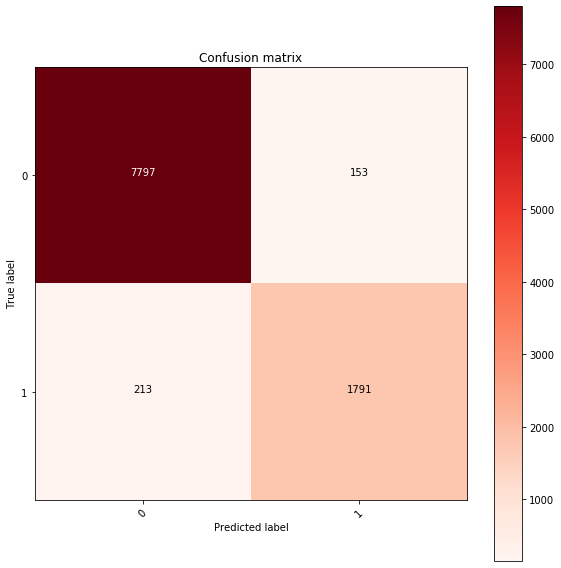

In [49]:
pl.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=data_train_no['y'].unique(),
                      cmap=pl.cm.Reds, normalize=False)

In [50]:
# F1 score:
from sklearn.metrics import f1_score
print('The F1 Score for this model is {}'.format(np.round(f1_score(y_test, y_pred.round(), average='binary'), 4)))

The F1 Score for this model is 0.9073


____
### Random Forest Classifier
#### Building the model


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [52]:
def run_model (model, Xtrain, ytrain, Xtest, ytest): 
    model.fit(Xtrain, ytrain)
    score = model.score(Xtest, ytest)
    score = "{0:6.2f}".format(score)
    obb_score = "{0:.4f}".format(model.oob_score_)
    return float(score), float(obb_score)

- Raw model

In [53]:
rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [54]:
run_model(rf_model, X_train, y_train, X_test, y_test)

(0.8, 0.7986)

 - Model Optimization

In [55]:
# Criteria
criteria = ['entropy', 'gini']
for crit in criteria:
    model_opt = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=crit,
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
    scoring = run_model(model_opt, X_train, y_train, X_test, y_test)
    print (crit, '\n', scoring[0], scoring[1])
 

entropy 
 0.8 0.7986
gini 
 0.8 0.7986


    No difference in criteria

In [56]:
# Features
features = [0.3, 0.5, 1, 2, 3, 'auto']
for feat in features:
    model_opt = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=feat, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
    scoring = run_model(model_opt, X_train, y_train, X_test, y_test)
    print (feat, '\n', scoring[0], scoring[1])

0.3 
 0.8 0.7986
0.5 
 0.8 0.7986
1 
 0.8 0.7986
2 
 0.8 0.7986
3 
 0.8 0.7986
auto 
 0.8 0.7986


    No difference in number of max features

In [57]:
# n_estimators
estimators = [100, 500, 1000, 2000]
for est in estimators:
    model_opt = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=est, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
    scoring = run_model(model_opt, X_train, y_train, X_test, y_test)
    print (est, '\n', scoring[0], scoring[1])

100 
 0.8 0.7986
500 
 0.8 0.7986
1000 
 0.8 0.7986
2000 
 0.8 0.7986


    No difference in number of estimators

In [58]:
# n_jobs
jobs = [1, 2, 3, 4, 5]
for job in jobs:
    model_opt = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=job,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
    scoring = run_model(model_opt, X_train, y_train, X_test, y_test)
    print (job, '\n', scoring[0], scoring[1])

1 
 0.8 0.7986
2 
 0.8 0.7986
3 
 0.8 0.7986
4 
 0.8 0.7986
5 
 0.8 0.7986


    No difference in number jobs

In [59]:
# max_depth
depths = [2, 3, 5, None]
for depth in depths:
    model_opt = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=depth, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
    scoring = run_model(model_opt, X_train, y_train, X_test, y_test)
    print (depth, '\n', scoring[0], scoring[1])

2 
 0.8 0.7986
3 
 0.8 0.7986
5 
 0.8 0.7991
None 
 0.87 0.8714


    The optimal value for the max_depth option is None and it increases the score of the model to 0.87 from 0.8. 
----
- Optimized model and test on validation set

In [60]:
RF_model_opt = RandomForestClassifier(criterion='gini', max_depth=None, max_features='auto', n_estimators=100, n_jobs=None, oob_score=True)
opt_score = run_model(RF_model_opt, X_train, y_train, X_val, y_val)

In [61]:
print('Score for the optimized random forest model =  {}'.format(opt_score[0]))

Score for the optimized random forest model =  0.87


____

## Making predictions on the test data file 

In [62]:
test_data = pd.read_csv('data_files/exercise_01_test.csv', low_memory=False)
test_data.shape

(10000, 100)

In [63]:
test_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,-23.230884,-1.809757,12.380690,-4.101199,-60.760749,-22.957453,-1.964078,-0.631029,-4.306616,-4.694198,...,-200.759241,1.474824,-8.057325,asia,3.418412,-10.364264,-18.055341,-6.236096,-4.909211,47.679903
1,138.561415,1.107473,-19.781009,-17.584757,-76.922109,71.816830,-0.418432,1.403957,-5.367051,0.039857,...,-323.789253,5.539663,-1.958140,asia,-5.208792,-52.514599,-0.946514,-20.699992,-3.704683,-35.404859
2,-9.243047,-10.207303,-7.507803,3.152110,-14.915059,30.576213,-0.378178,2.606353,1.581679,4.802973,...,27.816461,-0.977431,10.324237,asia,7.939948,19.031967,7.961947,6.761312,-1.072949,36.075623
3,8.963713,17.580528,13.884170,-17.164185,-33.547539,19.288187,-1.219019,5.574611,-3.879657,2.693111,...,-374.983643,-2.631231,2.206816,asia,-8.234822,-14.077963,-11.476360,15.808888,6.361906,47.278303
4,27.431028,-6.232849,52.780835,-7.053903,5.679193,-29.618139,1.331833,4.425692,-4.213258,-0.398755,...,-352.113759,1.759678,-7.117473,asia,5.998549,-32.618465,-11.656808,-19.310773,-2.407052,-54.988928


#### - Non-Numeric Features

In [64]:
# Converting x41 to numeric after removing the '$' sign
test_data.loc[:,'x41'] = test_data.x41.str.replace('$', " ").astype(float)

In [65]:
#### Fixing 'typos'
#x34 to title and keep only the first three letters of the brands
test_data.loc[:,'x34'] = test_data.x34.str[:3].str.upper()

#x35 and x68 to 3 letter format
test_data.loc[:,'x35'] = test_data.x35.str[:3].str.title().str.upper()
test_data.loc[:,'x68'] = test_data.x68.str[:3].str.title().str.upper()
test_data.loc[:,'x68'] = np.where(test_data.x68 == 'DEV', 'DEC', test_data.x68)

#x93 Europe appears to have a typo
test_data.loc[:,'x93'] = np.where(test_data.x93 == 'euorpe', 'EUROPE', test_data.x93.str.upper())

In [66]:
original_test_columns = types_of_columns(test_data)

In [67]:
for col in original_test_columns[0].index:
    print(col)
    test_data[col] = test_data[col].fillna(data_enc[col].mode()[0])
    data_enc[col] = data_enc[col].fillna(data_enc[col].mode()[0])
    print(test_data[col].unique())
    print(data_enc[col].unique())

    l_encoder.fit(data_enc[col])
    test_data[col] = l_encoder.transform(test_data[col])
test_data.head()

x34
['VOL' 'TOY' 'TES' 'HON' 'CHR' 'BMW' 'MER' 'NIS' 'FOR' 'CHE']
['BMW' 'NIS' 'HON' 'TOY' 'VOL' 'TES' 'CHR' 'FOR' 'MER' 'CHE']
x35
['WED' 'THU' 'TUE' 'FRI' 'MON']
['WED' 'THU' 'FRI' 'TUE' 'MON']
x45
['0.01%' '0.0%' '-0.02%' '-0.0%' '-0.01%' '0.03%' '-0.03%' '0.02%'
 '-0.04%' '0.04%']
['0.0%' '0.01%' '-0.01%' '0.02%' '-0.02%' '-0.0%' '-0.03%' '0.03%' '0.04%'
 '-0.04%']
x68
['JUN' 'JUL' 'AUG' 'MAY' 'APR' 'SEP' 'OCT' 'MAR' 'DEC' 'NOV' 'FEB' 'JAN']
['JUN' 'JUL' 'MAY' 'AUG' 'APR' 'MAR' 'OCT' 'SEP' 'NOV' 'FEB' 'DEC' 'JAN']
x93
['ASIA' 'EUROPE' 'AMERICA']
['EUROPE' 'ASIA' 'AMERICA']


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,-23.230884,-1.809757,12.380690,-4.101199,-60.760749,-22.957453,-1.964078,-0.631029,-4.306616,-4.694198,...,-200.759241,1.474824,-8.057325,1,3.418412,-10.364264,-18.055341,-6.236096,-4.909211,47.679903
1,138.561415,1.107473,-19.781009,-17.584757,-76.922109,71.816830,-0.418432,1.403957,-5.367051,0.039857,...,-323.789253,5.539663,-1.958140,1,-5.208792,-52.514599,-0.946514,-20.699992,-3.704683,-35.404859
2,-9.243047,-10.207303,-7.507803,3.152110,-14.915059,30.576213,-0.378178,2.606353,1.581679,4.802973,...,27.816461,-0.977431,10.324237,1,7.939948,19.031967,7.961947,6.761312,-1.072949,36.075623
3,8.963713,17.580528,13.884170,-17.164185,-33.547539,19.288187,-1.219019,5.574611,-3.879657,2.693111,...,-374.983643,-2.631231,2.206816,1,-8.234822,-14.077963,-11.476360,15.808888,6.361906,47.278303
4,27.431028,-6.232849,52.780835,-7.053903,5.679193,-29.618139,1.331833,4.425692,-4.213258,-0.398755,...,-352.113759,1.759678,-7.117473,1,5.998549,-32.618465,-11.656808,-19.310773,-2.407052,-54.988928


In [68]:
for column in original_test_columns[1].index:
    test_data[column] = test_data[column].fillna(data_train[column].mean())

In [69]:
test_data.shape

(10000, 100)

    - Making predictions and getting the probabilities for class 1

In [70]:
# Standarizing the features
test = sc.transform(test_data)

In [71]:
# Getting the classes from the ANN model
ANN_classes = classifier.predict_classes(test)

In [72]:
# Getting the probabilities from the ANN model
ANN_prob = classifier.predict_proba(test)

In [73]:
# Putting both classes label and probability into one df
ANN_probdf = pd.DataFrame(data=ANN_prob)
ANN_probdf.columns = ['prob']
ANN_probdf.head()

,prob
0,0.001473
1,0.000816
2,0.004836
3,0.987234
4,0.004293


In [74]:
ANN_classdf = pd.DataFrame(data=ANN_classes)
ANN_classdf.columns = ['cat']
ANN_classdf.head()

,cat
0,0
1,0
2,0
3,1
4,0


In [75]:
ANNprob_df = pd.concat([ANN_classdf, ANN_probdf], 1)
ANNprob_df.loc[:,'prob1'] = np.where(ANNprob_df.cat == 1, ANNprob_df.prob, 1-ANNprob_df.prob)
ANNprob_df.head()

,cat,prob,prob1
0,0,0.001473,0.998527
1,0,0.000816,0.999184
2,0,0.004836,0.995164
3,1,0.987234,0.987234
4,0,0.004293,0.995707


In [76]:
# Getting the probabilities from the Random Forest Model
RP_prob = RF_model_opt.predict_proba(test)

In [77]:
RF_model_opt.classes_

array([0, 1])

In [78]:
RFprob_df = pd.DataFrame(data=RP_prob)

    - Saving the predictions